# Supervised Machine Learning for Heart Disease Prediction 


# 1. Business Problem
The goal is to develop a machine learning model that can effectively predict the presence or absence of heart disease. <br>
This would allow the medical team to perform early intervention to prevent cardiac arrest and death. 

# 2. Data import

### Loading the required libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import confusion_matrix

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")


### Importing the data

In [2]:
# Load cardio dataset
df = pd.read_csv('JF_cardio_data_final.csv')

# 3. Data Understanding

### Raw Data Exploration and Cleaning

A subset of dataset from Parkway Pantai was used for this project.  
   
Data cleaning was performed to remove incorrect, inconsistent data using Microsoft Excel with the following criteria:

1) Systolic (ap_hi)
-	Keep range from 60 to 200 

2) Diastolic (ap_lo)
-	Keep range from 40 to 110
-	Ensure ap_hi > ap_lo by creating a new custom column (validate_bp)

3) Weight (weight)
-	Keep range from 40 to 200

4) BMI 
- Calculate body mass index by creating a new custom column (bmi)     
- Keep range from 14 to 70

The patients' age were recorded in days. 
In order to know the patient age in years, a new custom column (age_yr) was created to perform this calculation.

The dataset contains unique, no null and no duplicate records. 

<b> Cleaned up 2.4% of data (1,677 out of 70,000) <br>
Balance 68,323 

### Cleaned Data Exploration  

In [3]:
# Understanding data in different ways

print("\033[1mDimension of the data:", df.shape,"\033[0m")

print("\n", "--" * 50, "\n")

print("\033[1mSummary of the data\033[0m\n")
display(df.info())

print("\n", "--" * 50, "\n")

print("\033[1mMissing values in the entire dataframe\n")
display(df.isnull().sum().sum())

print("\033[1mDuplicated rows\n")
display(df.duplicated().sum())


print("\n", "--" * 50, "\n")

print("\033[1mStatistical description:")
display(df.describe())


Dimension of the data: (68323, 19) 

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68323 entries, 0 to 68322
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         68323 non-null  object
 1   country      68323 non-null  object
 2   id           68323 non-null  int64 
 3   active       68323 non-null  int64 
 4   age          68323 non-null  int64 
 5   age_yr       68323 non-null  int64 
 6   alco         68323 non-null  int64 
 7   ap_hi        68323 non-null  int64 
 8   ap_lo        68323 non-null  int64 
 9   validate_bp  68323 non-null  object
 10  cholesterol  68323 non-null  int64 
 11  gender       68323 non-null  int64 
 12  gluc         68323 non-null  int64 
 13  height       68323 non-null  int64 
 14  occupation   68323 non-null  object
 15  smoke        68323 non-null

None


 ---------------------------------------------------------------------------------------------------- 

Missing values in the entire dataframe



0

Duplicated rows



0


 ---------------------------------------------------------------------------------------------------- 

Statistical description:


,id,active,age,age_yr,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,bmi,disease
count,68323.000000,68323.000000,68323.000000,68323.000000,68323.000000,68323.000000,68323.000000,68323.000000,68323.000000,68323.000000,68323.000000,68323.000000,68323.000000,68323.000000,68323.000000
mean,49974.963292,0.803346,19462.439515,53.321356,0.053203,126.459318,81.155950,1.363435,1.348506,1.225078,164.408340,0.087862,74.089457,27.446482,0.493523
std,28851.905707,0.397472,2468.977488,6.770044,0.224440,16.276117,9.112786,0.678043,0.476501,0.571013,7.949968,0.283096,14.214299,5.246935,0.499962
min,0.000000,0.000000,10798.000000,30.000000,0.000000,60.000000,40.000000,1.000000,1.000000,1.000000,91.000000,0.000000,40.000000,15.000000,0.000000
25%,24993.500000,1.000000,17656.000000,48.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,24.000000,0.000000
50%,50019.000000,1.000000,19700.000000,54.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,26.000000,0.000000
75%,74877.500000,1.000000,21323.000000,58.000000,0.000000,140.000000,90.000000,1.000000,2.000000,1.000000,170.000000,0.000000,82.000000,30.000000,1.000000
max,99999.000000,1.000000,23713.000000,65.000000,1.000000,200.000000,110.000000,3.000000,2.000000,3.000000,207.000000,1.000000,200.000000,70.000000,1.000000


### Categorical Variables

#### Normal distribution of healthy and heart disease patients
Healthy patients       : 34,604 <br>
Heart disease patients : 33,719

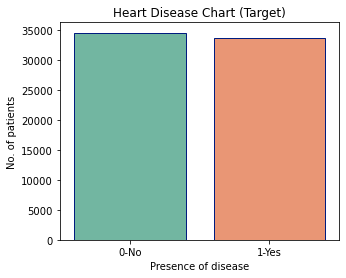

In [4]:
##import seaborn as sns
##import matplotlib.pyplot as plt

# Sample categorical data and corresponding custom labels
custom_labels = ["0-No", "1-Yes"]

# Create a countplot with custom x-axis labels
plt.figure(figsize=(5, 4))
ax = sns.countplot(x=df['disease'], palette="Set2", edgecolor=sns.color_palette('dark',n_colors=1))

# Customize x-axis labels
ax.set_xticklabels(custom_labels)

# Add labels and a title
plt.xlabel("Presence of disease")
plt.ylabel("No. of patients")
plt.title("Heart Disease Chart (Target)")

# Show the plot
plt.show()

#### Imbalance distribution of inputs

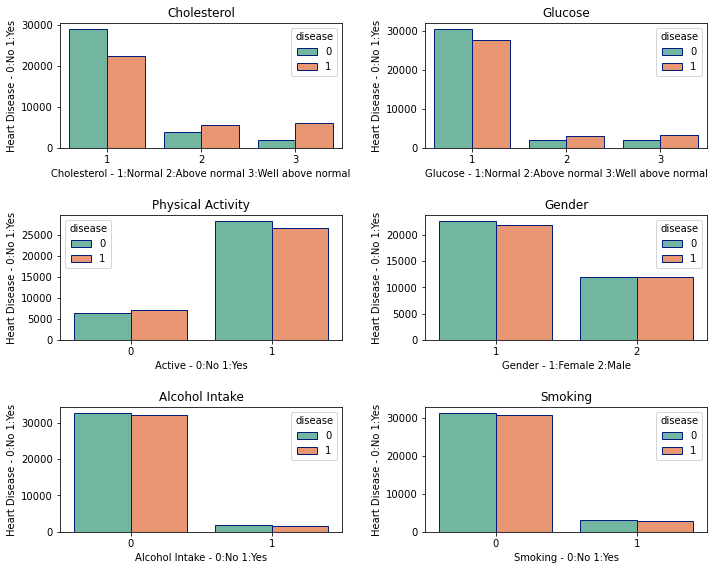

In [5]:
# Create a figure and a 3x3 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Assuming you have four Seaborn plots named plot1, plot2, plot3, and plot4
# Replace these with your actual Seaborn plotting code

# Plot 1
sns.countplot(x='cholesterol',hue='disease', 
              data=df, palette='Set2',edgecolor=sns.color_palette('dark',n_colors=1),
              ax=axes[0,0])
# Adding labels and title
axes[0, 0].set_xlabel('Cholesterol - 1:Normal 2:Above normal 3:Well above normal')
axes[0, 0].set_ylabel('Heart Disease - 0:No 1:Yes')
axes[0, 0].set_title('Cholesterol')

# Plot 2
sns.countplot(x='gluc',hue='disease', 
              data=df, palette='Set2',edgecolor=sns.color_palette('dark',n_colors=1),
              ax=axes[0,1])
# Adding labels and title
axes[0, 1].set_xlabel('Glucose - 1:Normal 2:Above normal 3:Well above normal')
axes[0, 1].set_ylabel('Heart Disease - 0:No 1:Yes')
axes[0, 1].set_title('Glucose')

# Plot 3
sns.countplot(x='active',hue='disease', 
              data=df, palette='Set2',edgecolor=sns.color_palette('dark',n_colors=1),
              ax=axes[1,0])
# Adding labels and title
axes[1, 0].set_xlabel('Active - 0:No 1:Yes')
axes[1, 0].set_ylabel('Heart Disease - 0:No 1:Yes')
axes[1, 0].set_title('Physical Activity')


# Plot 4
sns.countplot(x='gender',hue='disease', 
              data=df, palette='Set2',edgecolor=sns.color_palette('dark',n_colors=1),
              ax=axes[1,1])
# Adding labels and title
axes[1, 1].set_xlabel('Gender - 1:Female 2:Male')
axes[1, 1].set_ylabel('Heart Disease - 0:No 1:Yes')
axes[1, 1].set_title('Gender')


# Plot 5
sns.countplot(x='alco',hue='disease', 
              data=df, palette='Set2',edgecolor=sns.color_palette('dark',n_colors=1),
              ax=axes[2,0])

# Adding labels and title
axes[2, 0].set_xlabel('Alcohol Intake - 0:No 1:Yes')
axes[2, 0].set_ylabel('Heart Disease - 0:No 1:Yes')
axes[2, 0].set_title('Alcohol Intake')


# Plot 6
sns.countplot(x='smoke',hue='disease', 
              data=df, palette='Set2',edgecolor=sns.color_palette('dark',n_colors=1),
              ax=axes[2,1])
# Adding labels and title
axes[2, 1].set_xlabel('Smoking - 0:No 1:Yes')
axes[2, 1].set_ylabel('Heart Disease - 0:No 1:Yes')
axes[2, 1].set_title('Smoking')



# Adjust the spacing between subplots with various parameters
plt.tight_layout(pad=1.0, h_pad=2.0, w_pad=3.0, rect=[1, 1, 2, 2])

# Show the plots
plt.show()

### Numerial Variables 

#### Older group patients 55 years old and above were more likely to get a heart disease as compared those younger

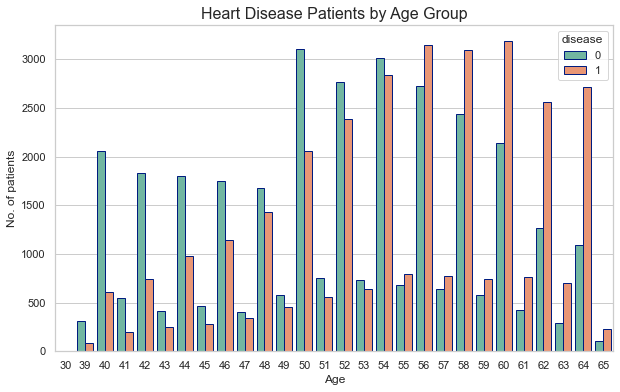

In [6]:
# Visualise the data
plt.figure(figsize=(10,6))
sns.set(style="whitegrid") 
sns.countplot(x='age_yr',hue='disease', data=df, palette='Set2',edgecolor=sns.color_palette('dark',n_colors=1))

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('No. of patients')
plt.title('Heart Disease Patients by Age Group', fontsize=16)
plt.show()


#### Heart disease patients were those with systolic 140 and above or Diastolic bp 70 and above

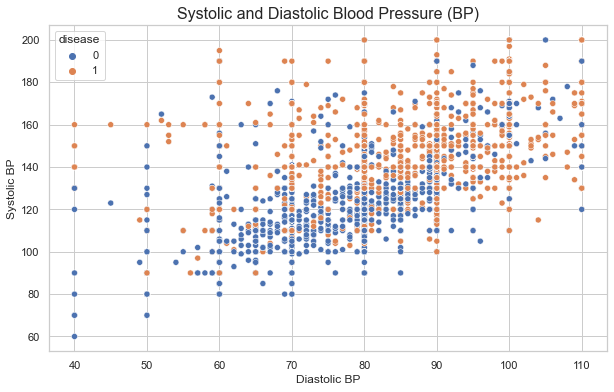

In [7]:
#Systolic and Diastolic distribution

sns.set(style="whitegrid") 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y="ap_hi", x='ap_lo',hue='disease')

# Adding labels and title
plt.xlabel('Diastolic BP')
plt.ylabel('Systolic BP')
plt.title('Systolic and Diastolic Blood Pressure (BP)', fontsize=16)

plt.show()

#### BMI - obese patients were likely to get a heart disease risk 
Over 50 and above

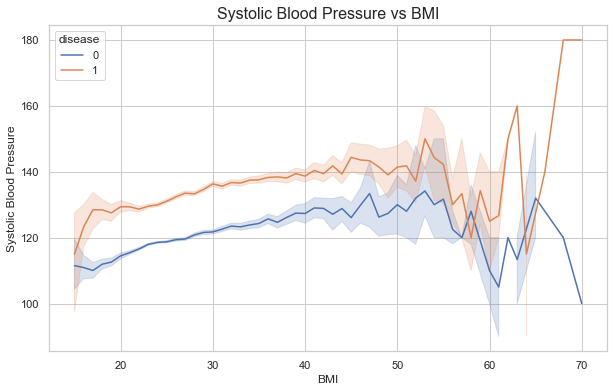

In [8]:
#http://localhost:8888/notebooks/Dashboard%20using%20Python/4.%20Advanced%20Data%20Visualization.ipynb
plt.figure(figsize=(10,6))
sns.lineplot(x='bmi', y='ap_hi', hue='disease', data=df)
# Adding labels and title
plt.xlabel('BMI')
plt.ylabel('Systolic Blood Pressure')
plt.title('Systolic Blood Pressure vs BMI', fontsize=16)
#plt.xticks(range(15, 80, 5))
plt.show()

## Correlation Analysis

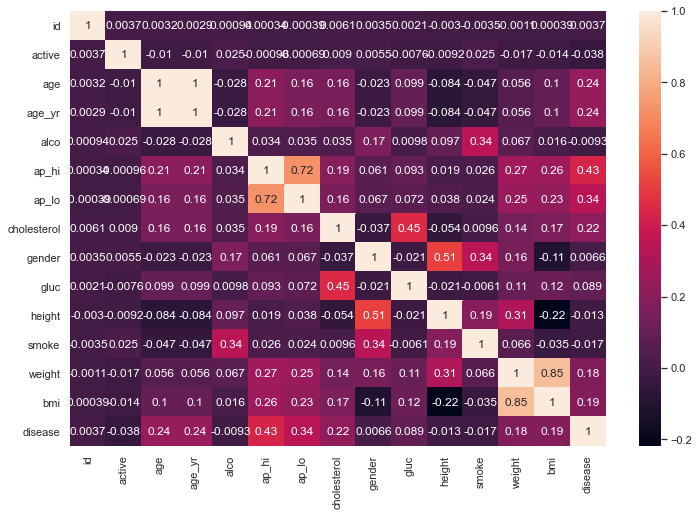

In [9]:
# Let's plot the correlation matrix as a heatmap
plt.figure(figsize = (12,8)) #7 inch by 7 inch
sns.heatmap(df.corr(), annot = True)
plt.show()

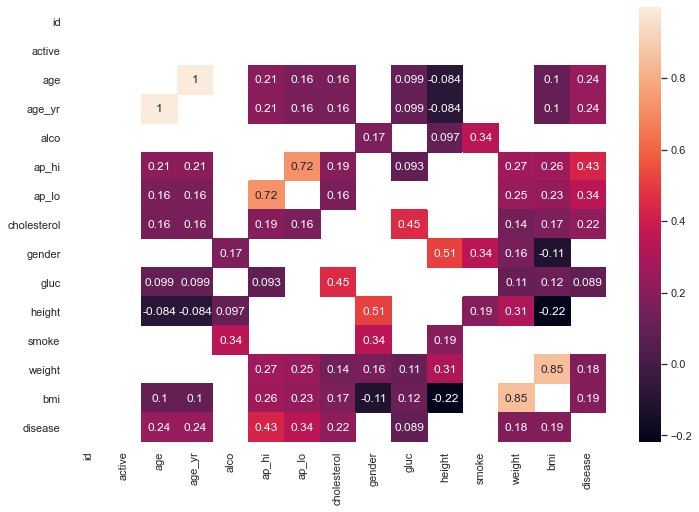

In [10]:
#dfCorr = 1.0 means same data (e.g. Year Built vs Year Built)
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr > 0.08) | (dfCorr < -0.08)) & (dfCorr !=1.000)]
##display(filteredDf)
plt.figure(figsize=(12,8))
sns.heatmap(filteredDf, annot=True)
plt.show()

# 4. Data Preparation

### Feature Selection
**Target:** Disease <br>
**Predictors:** age, systolic and diastolic blood pressure, cholesterol, glucose level, bmi

In [11]:
#Drop unrelated columns
column_to_drop=['date','country', 'id', 'active','age', 'validate_bp',
                'occupation', 'weight','alco','gender','smoke','height']

df = df.drop(columns=column_to_drop, axis=1)
df.head()

,age_yr,ap_hi,ap_lo,cholesterol,gluc,bmi,disease
0,50,110,80,1,1,22,0
1,55,140,90,3,1,35,1
2,52,130,70,3,1,24,1
3,48,150,100,1,1,29,1
4,48,100,60,1,1,23,0


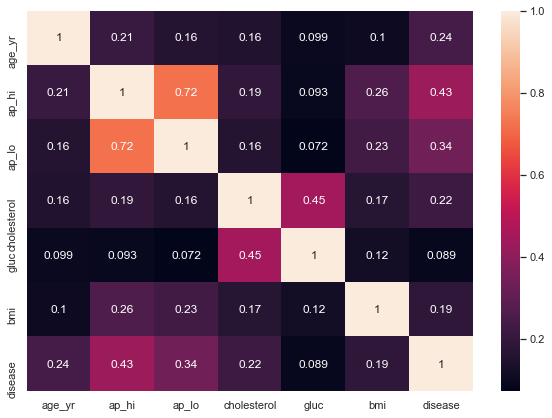

In [12]:
# Correlation matrix
##print(df.corr())

# Let's plot the correlation matrix as a heatmap
plt.figure(figsize = (10,7)) #10 inch by 7 inch
sns.heatmap(df.corr(), annot = True)
plt.show()

# Data Models used:   
## Classifiers Model
1. Support Vector Machine (SVM) <br>
2. K-Nearest Neighbour (KNN) <br> 
3. Logistic Regression <br>
4. Decision Tree <br>

 ### Feature Scaling to ensure all features had the same scale for optimise performance

In [13]:
# Separate features (X) and target (y)
scaler = StandardScaler()
scaler.fit(df.drop('disease', axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)

#Remove target and scaled features  
scaled_features = scaler.transform(df.drop('disease', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,age_yr,ap_hi,ap_lo,cholesterol,gluc,bmi
0,-0.490599,-1.011263,-0.126850,-0.536010,-0.394176,-1.038039
1,0.247954,0.831942,0.970517,2.413676,-0.394176,1.439616
2,-0.195178,0.217540,-1.224217,2.413676,-0.394176,-0.656861
3,-0.786021,1.446343,2.067884,-0.536010,-0.394176,0.296083
4,-0.786021,-1.625665,-2.321585,-0.536010,-0.394176,-0.847450


### Split the cardio data into Training and Testing set (Test size 20%)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['disease'], test_size=0.2, random_state=42)

In [15]:
# Printing the total counts of unique values in the train and test
y_train_count = y_train.value_counts()
y_test_count = y_test.value_counts()

print("\033[1mTotal no. of unique rows for Training and Testing\033[0m")
print("Train Shape:",X_train.shape)
print(y_train_count,"\n")

print("Test Shape:",X_test.shape)
print(y_test_count,"\n")

#In percentage
print("\033[1mIn percentage\033[0m")
y_train_percent = ((y_train_count/54658)*100)
y_test_percent = ((y_test_count/13665)*100)

print("\033[1mTrain\033[0m")
print(y_train_percent)
print("\n")

print("\033[1mTest\033[0m")
print(y_test_percent)

Total no. of unique rows for Training and Testing
Train Shape: (54658, 6)
0    27604
1    27054
Name: disease, dtype: int64 

Test Shape: (13665, 6)
0    7000
1    6665
Name: disease, dtype: int64 

In percentage
Train
0    50.503129
1    49.496871
Name: disease, dtype: float64


Test
0    51.225759
1    48.774241
Name: disease, dtype: float64


### Support Vector Machine (SVM ) Classifier Model
Reference: https://scikit-learn.org/stable/modules/svm.html#kernel-functions

In [16]:
# Create an SVM model with hyperparameter tuning C=1.0
#Test with kernel functions linear/polynomial/rbf/sigmoid, all gave similar accurarcy
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make prediction on the test set
svmPrediction = svm_model.predict(X_test)

# Calculate accuracy
svmAccuracy = accuracy_score(y_test, svmPrediction)
print(f"\033[1mSVM Accuracy: {svmAccuracy*100:.2f} %\033[0m")


SVM Accuracy: 73.08 %


### K-Nearest Neighbour (KNN) Classifier Model 
Reference: https://scikit-learn.org/stable/modules/neighbors.html

In [17]:
# importing the model

from sklearn.neighbors import KNeighborsClassifier

#### Elbow graph to determine right K value based on error rate
Reference: https://youtu.be/wTF6vzS9fy4

In [18]:
#Test K from 1 to 50
error_rate = []

for i in range(1,50):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train, y_train)
    pred_1 = knn1.predict(X_test)
    error_rate.append(np.mean(pred_1 != y_test))

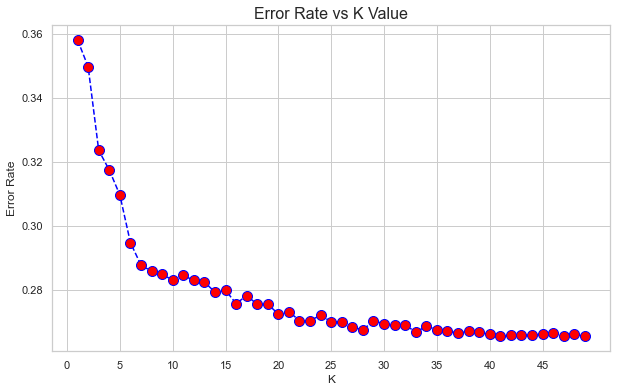

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title("Error Rate vs K Value",fontsize=16)
plt.xlabel("K")
plt.ylabel('Error Rate')
plt.xticks(range(0, 50, 5))
plt.show()

#### KNN Accuracy 

In [20]:
# Take odd K value 27 to prevent ties in the data point classification (Has heart disease / no heart disease)
# Manhattan metric improved the accuracy

knn= KNeighborsClassifier(n_neighbors=27, metric='manhattan') 

knn.fit(X_train,y_train)

knnPrediction=knn.predict(X_test)

knnAccuracy = metrics.accuracy_score(knnPrediction, y_test)

print(f"\033[1mKNN Accuracy: {knnAccuracy*100:.2f} %\033[0m")

KNN Accuracy: 73.21 %


### Logistic Regression Classifier Model
Reference: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [21]:
# Importing the algorithms
from sklearn.linear_model import LogisticRegression

In [22]:
# instantiating and training the model on training dataset, 
# and making predictions for the testing data

log = LogisticRegression()

log.fit(X_train,y_train)

logPrediction = log.predict(X_test)

logAccuracy = metrics.accuracy_score(logPrediction, y_test)

print(f"\033[1mLogistic Regression Accuracy: {logAccuracy*100:.2f} %\033[0m")

Logistic Regression Accuracy: 73.03 %


### Test Logistic Regression with grid search, same accuracy 73.03%
Ref: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [23]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=55000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.983721 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.983721 (0.001367) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983721 (0.001367) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.983721 (0.001332) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.983721 (0.001367) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983721 (0.001367) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.983721 (0.001332) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.983721 (0.001367) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983721 (0.001367) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.983715 (0.001323) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.983721 (0.001367) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983721 (0.001367) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.983697 (0.001375) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.983721 (0.001367) wit

In [24]:
# instantiating and training the model on training dataset, 
# and making predictions for the testing data

log1 = LogisticRegression(C=100, penalty='l2', solver='newton-cg')

log1.fit(X_train,y_train)

logPrediction1 = log1.predict(X_test)

logAccuracy1 = metrics.accuracy_score(logPrediction1, y_test)

print(f"\033[1mThe accuracy of logistic regression using GridSearch is: {logAccuracy1*100:.2f} % \033[0m")

The accuracy of logistic regression using GridSearch is: 73.03 % 


### Decision Tree Classifier Model
Reference: https://scikit-learn.org/stable/modules/tree.html

In [25]:
# import the model
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree= DecisionTreeClassifier()

tree.fit(X_train,y_train)

treePrediction=tree.predict(X_test)

treeAccuracy = metrics.accuracy_score(treePrediction,y_test)


print(f"\033[1mDecision Tree Accuracy: {treeAccuracy*100:.2f} %\033[0m")

Decision Tree Accuracy: 68.10 %


# Model Prediction Performance

### SVM, KNN and Logistic Regression have an accuracy of 73%

In [27]:
print("\033[1m\033[4mPrediction Accuracy\033[0m\n")
print(f"\033[1mSVM : {svmAccuracy*100:.2f} % \033[0m\n")
print(f"\033[1mKNN : {knnAccuracy*100:.2f} % \033[0m\n")
print(f"\033[1mLogistic Regression : {logAccuracy*100:.2f} % \033[0m \n")
print(f"Decision Tree : {treeAccuracy*100:.2f} % \n")


Prediction Accuracy

SVM : 73.08 % 

KNN : 73.21 % 

Logistic Regression : 73.03 %  

Decision Tree : 68.10 % 



# Confusion Matrix and Classification Report
Reference: 1) https://youtu.be/Kdsp6soqA7o  2) https://www.youtube.com/watch?v=prWyZhcktn4 

In [28]:
#Confusion Matrix Transpose Function
def printConfusionMatrix(solver, y_test, y_predict):
    cm = confusion_matrix(y_test,y_predict, labels=[1,0])
    plt.figure(figsize=(5, 5))   
        
    #Transpose 
    heatmap = sns.heatmap(cm.T, annot=True, fmt='d', cmap='summer', cbar=False, annot_kws={"size": 14})
    
    #Display heatmap
    heatmap.set_yticklabels(['Predicted 1', 'Predicted 0'])
    heatmap.set_xticklabels(['Actual 1', 'Actual 0'])
    heatmap.text(0.5, 0.1, 'TP', size=14, horizontalalignment='center', verticalalignment='top')
    heatmap.text(1.5, 0.1, 'FP', size=14, horizontalalignment='center', verticalalignment='top')
    heatmap.text(0.5, 1.1, 'FN', size=14, horizontalalignment='center', verticalalignment='top')
    heatmap.text(1.5, 1.1, 'TN', size=14, horizontalalignment='center', verticalalignment='top')
    plt.title("\nConfusion Matrix - " + solver +"\n", fontsize=14)
    plt.show()

# SVM Model Performance Evaluation

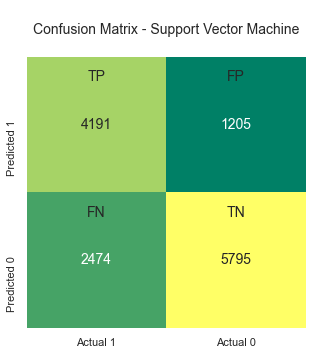

              precision    recall  f1-score   support

           0       0.70      0.83      0.76      7000
           1       0.78      0.63      0.69      6665

    accuracy                           0.73     13665
   macro avg       0.74      0.73      0.73     13665
weighted avg       0.74      0.73      0.73     13665



In [29]:
#SVM Confusion Matrix
printConfusionMatrix("Support Vector Machine", y_test,svmPrediction)
print(metrics.classification_report(y_test, svmPrediction))

#### SVM 
True Positives  (TP) 4191 patients had classified correctly with heart disease <br><br>
True Negatives  (TN) 5795 patients had classified correctly with no heart disease <br><br>
False Negatives (FN) 2474 patients had heart disease BUT model misclassified them as no heart disease <br><br>
False Positives (FP) 1205 patients didn't have heart disease BUT model misclassified them with heart disease <br>

Recall (Sensitivity) 63% - TP(4191)/TP(4191)+FN(2474) *100 <br>
Precision 78%  - TP(4191) / TP(4191) + FP(1205) *100 <br>
Accuracy 73% - TP(4191) + TN(5795) / TP(4191) + TN(5795) + FP(1205) + FN(2474) *100 <br>

# KNN Model Performance Evaluation

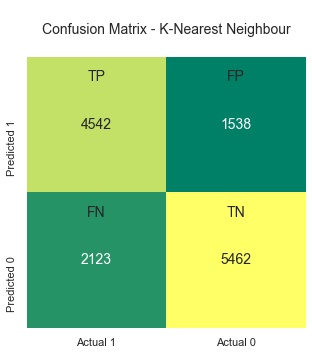

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      7000
           1       0.75      0.68      0.71      6665

    accuracy                           0.73     13665
   macro avg       0.73      0.73      0.73     13665
weighted avg       0.73      0.73      0.73     13665



In [30]:
#KNN Confusion Matrix
printConfusionMatrix("K-Nearest Neighbour", y_test, knnPrediction)
print(metrics.classification_report(y_test, knnPrediction))

#### KNN 
True Positives  (TP) 4542 patients had classified correctly with heart disease <br><br>
True Negatives  (TN) 5462 patients had classified correctly with no heart disease <br><br>
False Negatives (FN) 2123 patients had heart disease BUT model misclassified them as no heart disease <br><br>
False Positives (FP) 1538 patients didn't have heart disease BUT model misclassified them with heart disease <br>

Recall (Sensitivity) 68%, Precision 75%, Accuracy 73% <br> 

# Logistic Regression  Model Performance Evaluation

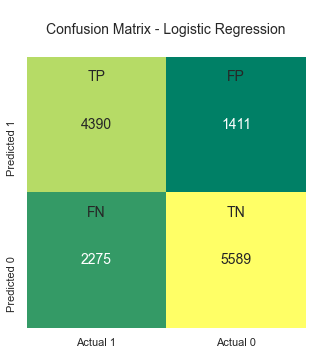

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7000
           1       0.76      0.66      0.70      6665

    accuracy                           0.73     13665
   macro avg       0.73      0.73      0.73     13665
weighted avg       0.73      0.73      0.73     13665



In [31]:
#Logistic Regression Confusion Matrix
printConfusionMatrix("Logistic Regression", y_test, logPrediction)
print(metrics.classification_report(y_test, logPrediction))

### Logistic Regression
True Positives  (TP) 4390 patients had classified correctly with heart disease <br><br>
True Negatives  (TN) 5589 patients had classified correctly with no heart disease <br><br>
False Negatives (FN) 2275 patients had heart disease BUT model misclassified them as no heart disease <br><br>
False Positives (FP) 1411 patients didn't have heart disease BUT model misclassified them with heart disease <br>

Recall (Sensitivity) 66%, Precision 76%, Accuracy 73% 

# Decision Tree  Model Performance Evaluation

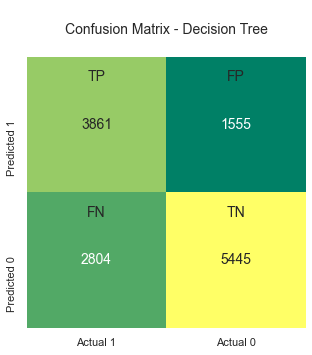

              precision    recall  f1-score   support

           0       0.66      0.78      0.71      7000
           1       0.71      0.58      0.64      6665

    accuracy                           0.68     13665
   macro avg       0.69      0.68      0.68     13665
weighted avg       0.69      0.68      0.68     13665



In [32]:
#Decision Tree Confusion Matrix
printConfusionMatrix("Decision Tree", y_test, treePrediction)
print(metrics.classification_report(y_test, treePrediction))

### Decision Tree
True Positives  (TP) 3863 patients had classified correctly with heart disease <br><br>
True Negatives  (TN) 5446 patients had classified correctly with no heart disease <br><br>
False Negatives (FN) 2800 patients had heart disease BUT model misclassified them as no heart disease <br><br>
False Positives (FP) 1554 patients didn't have heart disease BUT model misclassified them with heart disease <br>

Recall (Sensitivity) 58%, Precision 71%, Accuracy 68% 

# Conclusion

**K-Nearest Neighbour (KNN) is the right model** <br>
- Accurately predicted the highest number of heart disease patients <br>
- Lowest misclassification score as compared to the other two models
